In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline

sns.set()

import yfinance as yf
from pandas_datareader import data as pdr

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# yf.pdr_override()

from datetime import datetime

tech_stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

for stock in tech_stocks:
    globals()[stock] = yf.download(stock, start_date, end_date)

stock_data = [AAPL, GOOG, MSFT, AMZN]
stock_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for data, name in zip(stock_data, stock_names):
    data["Company_Name"] = name

all_stocks_df = pd.concat(stock_data, axis=0)
all_stocks_df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company_Name
Date,,,,,,,
2024-07-15,194.559998,196.190002,190.830002,192.720001,192.720001,40683200,AMAZON
2024-07-16,195.589996,196.619995,192.240005,193.020004,193.020004,33994700,AMAZON
2024-07-17,191.350006,191.580002,185.990005,187.929993,187.929993,48076100,AMAZON
2024-07-18,189.589996,189.679993,181.449997,183.750000,183.750000,51043600,AMAZON
2024-07-19,181.139999,184.929993,180.110001,183.130005,183.130005,43081800,AMAZON
2024-07-22,185.000000,185.059998,182.479996,182.550003,182.550003,39931900,AMAZON
2024-07-23,184.100006,189.389999,183.559998,186.410004,186.410004,47537700,AMAZON
2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,AMAZON
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,AMAZON


In [3]:
stock_to_use = 'GOOG'
stock_df = yf.download(stock_to_use, start='2012-01-01', end=datetime.now())
stock_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...
2024-07-22,182.350006,184.300003,181.899994,183.350006,183.350006,16303900
2024-07-23,183.839996,185.220001,183.330002,183.600006,183.600006,23772600
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700


In [4]:
closing_prices = stock_df.filter(['Close'])
price_values = closing_prices.values
train_size = int(np.ceil(len(price_values) * .80))

train_size

2529

In [5]:
!pip install minisom
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(price_values)

training_prices = scaled_prices[0:int(train_size), :]

som_grid_dimensions = (10,10)
som_network = MiniSom(som_grid_dimensions[0], som_grid_dimensions[1], training_prices.shape[1], sigma = 1.0 , learning_rate=0.5)
som_network.random_weights_init(scaled_prices)
som_network.train_random(training_prices, num_iteration=1000)

clustered_prices = np.zeros(training_prices.shape[0], dtype=int)
for i, _ in enumerate(clustered_prices):
    winner_node = som_network.winner(training_prices[i])
    clustered_prices[i] = winner_node[0]*som_grid_dimensions[0] + winner_node[1]

x_train_data = []
y_train_data = []

for i in range(20, len(training_prices)):
    x_train_data.append(training_prices[i-20:i,0])
    y_train_data.append(training_prices[i,0])
    if i <= 21:
        print(x_train_data)
        print(y_train_data)
        print()

[array([0.01482114, 0.01522107, 0.01392931, 0.01267657, 0.00883611,
       0.00893087, 0.00932383, 0.00983663, 0.00918866, 0.00968892,
       0.01029231, 0.01122037, 0.00375406, 0.00368856, 0.00304896,
       0.00145481, 0.0012611 , 0.00291657, 0.00259746, 0.00293469])]
[0.003035019721828333]

[array([0.01482114, 0.01522107, 0.01392931, 0.01267657, 0.00883611,
       0.00893087, 0.00932383, 0.00983663, 0.00918866, 0.00968892,
       0.01029231, 0.01122037, 0.00375406, 0.00368856, 0.00304896,
       0.00145481, 0.0012611 , 0.00291657, 0.00259746, 0.00293469]), array([0.01522107, 0.01392931, 0.01267657, 0.00883611, 0.00893087,
       0.00932383, 0.00983663, 0.00918866, 0.00968892, 0.01029231,
       0.01122037, 0.00375406, 0.00368856, 0.00304896, 0.00145481,
       0.0012611 , 0.00291657, 0.00259746, 0.00293469, 0.00303502])]
[0.003035019721828333, 0.003631429178748688]



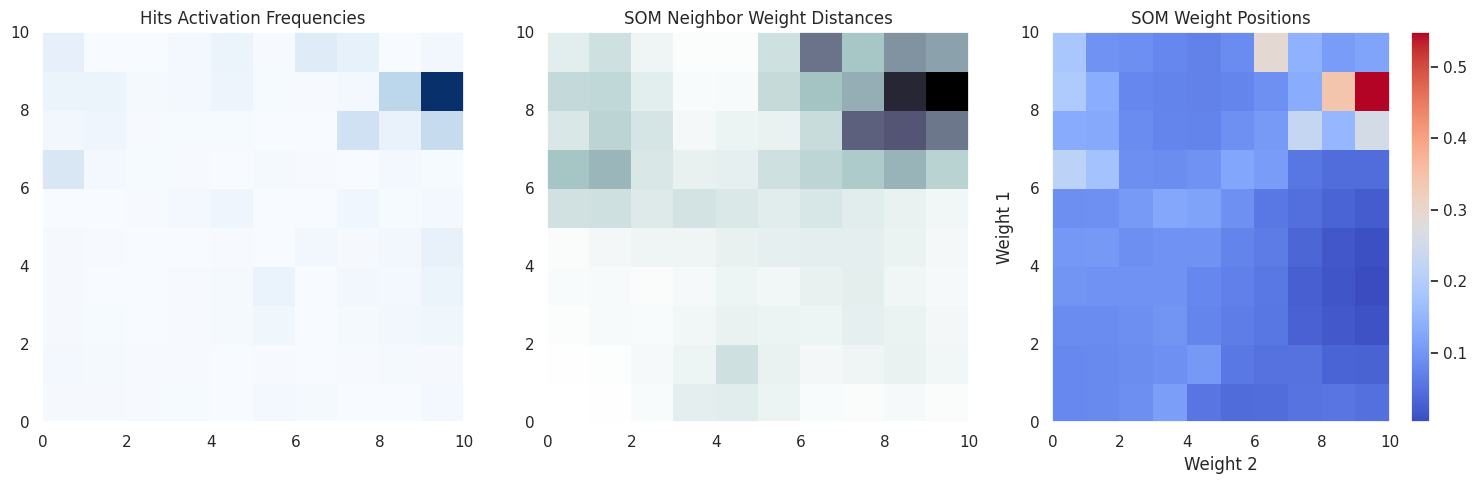

In [6]:


x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pcolor(som_network.activation_response(scaled_prices).T, cmap='Blues')
plt.colormaps()
plt.title('Hits Activation Frequencies')

plt.subplot(132)
plt.pcolor(som_network.distance_map().T, cmap='bone_r')
plt.colormaps()
plt.title('SOM Neighbor Weight Distances')

plt.subplot(133)
plt.pcolor(som_network.get_weights()[...,0].T, cmap='coolwarm')
plt.colorbar()
plt.title('SOM Weight Positions')
plt.xlabel('Weight 2')
plt.ylabel('Weight 1')

plt.tight_layout()
plt.show()


In [7]:

input_layer = tf.keras.Input(shape=(20,))
hidden_layer1 = tf.keras.layers.Dense(30, activation='sigmoid')(input_layer)
hidden_layer2 = tf.keras.layers.Dense(32, activation='sigmoid')(hidden_layer1)
hidden_layer3 = tf.keras.layers.Dense(1, activation='tanh')(hidden_layer2)

output_layer = tf.keras.layers.Dense(1)(hidden_layer3)

model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])

model.compile(loss='mse', optimizer='adam')

model.fit(x_train_data, y_train_data, batch_size=32, epochs=100)


Epoch 1/100
79/79 [==============================] - 2s 4ms/step - loss: 0.0361
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 9.6077e-04
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 8.7753e-04
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 8.0397e-04
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 7.4311e-04
Epoch 9/100
79/79 [==============================] - 0s 4ms/step - loss: 6.9877e-04
Epoch 10/100
79/79 [==============================] - 0s 6ms/step - loss: 6.5052e-04
Epoch 11/100
79/79 [==============================] - 0s 5ms/step - loss: 5.9673e-04
Epoch 12/100
79/79 [==============================] - 1s 7ms/step - loss: 5.7344e-04
Epoch

In [8]:

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_4 (Dense)             (None, 30)                630       
                                                                 
 dense_5 (Dense)             (None, 32)                992       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 1657 (6.47 KB)
Trainable params: 1657 (6.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


20/20 [==============================] - 0s 3ms/step


<ipython-input-9-cb6ecc35c2da>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set['Predictions'] = predicted_prices


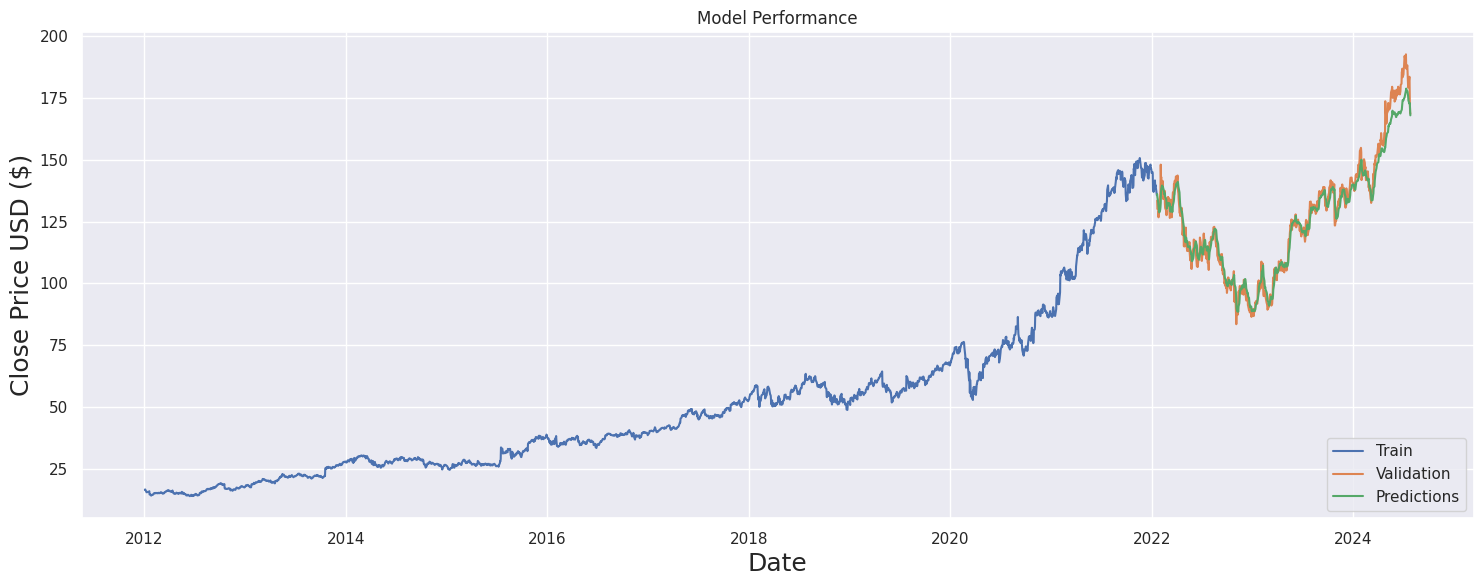

In [9]:
from sklearn import metrics

test_data_scaled = scaled_prices[train_size - 20:, :]
x_test_data = []
y_test_data = price_values[train_size:, :]

for i in range(20, len(test_data_scaled)):
    x_test_data.append(test_data_scaled[i-20:i, 0])

x_test_data = np.array(x_test_data)
x_test_data = np.reshape(x_test_data, (x_test_data.shape[0], x_test_data.shape[1], 1))

predicted_prices = model.predict(x_test_data)
predicted_prices = scaler.inverse_transform(predicted_prices)

#rmse = np.sqrt(np.mean(predicted_prices - y_test_data)**2)
#print(rmse)

training_set = closing_prices[:train_size]
validation_set = closing_prices[train_size:]
validation_set['Predictions'] = predicted_prices

plt.figure(figsize=(16,6))
plt.title('Model Performance')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(training_set['Close'])
plt.plot(validation_set[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [10]:
validation_set

,Close,Predictions
Date,,
2022-01-20,133.506500,136.120865
2022-01-21,130.091995,134.763458
2022-01-24,130.371994,132.766098
2022-01-25,126.735497,131.361633
2022-01-26,129.240005,129.564575
...,...,...
2024-07-22,183.350006,172.861328
2024-07-23,183.600006,172.680908
2024-07-24,174.369995,172.945328
